In [1]:
# Input data
import scipy.io as spio
import numpy as np

# Reading the data for the Face from all the subjects
BahramFace = spio.loadmat(file_name='../data/bci-project-data-RAW/BahramFace.mat')
DJFace = spio.loadmat(file_name='../data/bci-project-data-RAW/DJFace.mat')
NickFace = spio.loadmat(file_name='../data/bci-project-data-RAW/NickFace.mat')
RoohiFace = spio.loadmat(file_name='../data/bci-project-data-RAW/RoohiFace.mat')
SarahFace = spio.loadmat(file_name='../data/bci-project-data-RAW/SarahFace.mat')

# Deviding the input data into train and validation
# For creating the training and testing set, 30% percent of each subject is considered as test and
# 70% of each subject is conidered as training.
length = int(BahramFace['Intensification_Data'].shape[0] * 0.30)
# length

FacesDataAll = np.vstack(tup=(BahramFace['Intensification_Data'][:], 
                       DJFace['Intensification_Data'][:], 
                       NickFace['Intensification_Data'][:],
                      RoohiFace['Intensification_Data'][:],
                      SarahFace['Intensification_Data'][:]))

FacesDataTrainAll = np.vstack(tup=(BahramFace['Intensification_Data'][:-length], 
                       DJFace['Intensification_Data'][:-length], 
                       NickFace['Intensification_Data'][:-length],
                      RoohiFace['Intensification_Data'][:-length],
                      SarahFace['Intensification_Data'][:-length]))

FacesDataTest = np.vstack(tup=(BahramFace['Intensification_Data'][-length:], 
                       DJFace['Intensification_Data'][-length:], 
                       NickFace['Intensification_Data'][-length:],
                      RoohiFace['Intensification_Data'][-length:],
                      SarahFace['Intensification_Data'][-length:]))

print(FacesDataAll.shape, FacesDataAll.dtype, 
 FacesDataTest.shape, FacesDataTest.dtype, 
 FacesDataTrainAll.shape, FacesDataTrainAll.dtype)

BahramFaceDataTrain = BahramFace['Intensification_Data'][:-length]
DJFaceDataTrain = DJFace['Intensification_Data'][:-length]
NickFaceDataTrain = NickFace['Intensification_Data'][:-length]
RoohiFaceDataTrain = RoohiFace['Intensification_Data'][:-length]
SarahFaceDataTrain = SarahFace['Intensification_Data'][:-length]

# 30% of the total training data is validation,
# 70% of the total training data is training
# This is applied to every single subject data.
length2 = int(BahramFaceDataTrain.shape[0] * 0.30)
# length2

FacesDataTrain = np.vstack(tup=(BahramFaceDataTrain[:-length2], 
                       DJFaceDataTrain[:-length2], 
                       NickFaceDataTrain[:-length2],
                      RoohiFaceDataTrain[:-length2],
                      SarahFaceDataTrain[:-length2]))

FacesDataValid = np.vstack(tup=(BahramFaceDataTrain[-length2:], 
                       DJFaceDataTrain[-length2:], 
                       NickFaceDataTrain[-length2:],
                      RoohiFaceDataTrain[-length2:],
                      SarahFaceDataTrain[-length2:]))

print(FacesDataTrainAll.shape, FacesDataTrainAll.dtype, 
 FacesDataTrain.shape, FacesDataTrain.dtype, 
 FacesDataValid.shape, FacesDataValid.dtype)

(18720, 205, 16) float64 (5400, 205, 16) float64 (13320, 205, 16) float64
(13320, 205, 16) float64 (9540, 205, 16) float64 (3780, 205, 16) float64


In [2]:
FacesLabelAll = np.vstack(tup=(BahramFace['Intensification_Label'][:], 
                       DJFace['Intensification_Label'][:], 
                       NickFace['Intensification_Label'][:],
                      RoohiFace['Intensification_Label'][:],
                      SarahFace['Intensification_Label'][:]))

FacesLabelTrainAll = np.vstack(tup=(BahramFace['Intensification_Label'][:-length], 
                       DJFace['Intensification_Label'][:-length], 
                       NickFace['Intensification_Label'][:-length],
                      RoohiFace['Intensification_Label'][:-length],
                      SarahFace['Intensification_Label'][:-length]))

FacesLabelTest = np.vstack(tup=(BahramFace['Intensification_Label'][-length:], 
                       DJFace['Intensification_Label'][-length:], 
                       NickFace['Intensification_Label'][-length:],
                      RoohiFace['Intensification_Label'][-length:],
                      SarahFace['Intensification_Label'][-length:]))

print(FacesLabelAll.shape, FacesLabelAll.dtype,
 FacesLabelTest.shape, FacesLabelTest.dtype, 
 FacesLabelTrainAll.shape, FacesLabelTrainAll.dtype)

BahramFaceLabelTrain = BahramFace['Intensification_Label'][:-length]
DJFaceLabelTrain = DJFace['Intensification_Label'][:-length]
NickFaceLabelTrain = NickFace['Intensification_Label'][:-length]
RoohiFaceLabelTrain = RoohiFace['Intensification_Label'][:-length]
SarahFaceLabelTrain = SarahFace['Intensification_Label'][:-length]

FacesLabelTrain = np.vstack(tup=(BahramFaceLabelTrain[:-length2], 
                       DJFaceLabelTrain[:-length2], 
                       NickFaceLabelTrain[:-length2],
                      RoohiFaceLabelTrain[:-length2],
                      SarahFaceLabelTrain[:-length2]))

FacesLabelValid = np.vstack(tup=(BahramFaceLabelTrain[-length2:], 
                       DJFaceLabelTrain[-length2:], 
                       NickFaceLabelTrain[-length2:],
                      RoohiFaceLabelTrain[-length2:],
                      SarahFaceLabelTrain[-length2:]))

(18720, 1) uint8 (5400, 1) uint8 (13320, 1) uint8


In [3]:
# # Normalizing input data
# def normalize(inputs, inputs_all):
#     return (inputs - inputs_all.mean(axis=0)[None,:,:]) / inputs_all.std(axis=0)[None,:,:]
# Yalda suggested this normalization.
def normalize(inputs):
    return (inputs - inputs.mean(axis=0)[None,:,:]) / inputs.std(axis=0)[None,:,:]

# onehot vectorizing output labels
def one_hot(labels, n_class):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

# get minibatches for learning
def get_batches(X, y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

# Standardize/normalize train and test
# X_train_norm_all = normalize(inputs=FacesDataTrain, inputs_all=FacesDataAll)
X_train_norm = normalize(inputs=FacesDataTrain)
X_valid_norm = normalize(inputs=FacesDataValid)
X_test_norm = normalize(inputs=FacesDataValid)

print(X_train_norm.shape, X_train_norm.dtype, 
X_valid_norm.shape, X_valid_norm.dtype,
X_test_norm.shape, X_test_norm.dtype)

(9540, 205, 16) float64 (3780, 205, 16) float64 (3780, 205, 16) float64


In [4]:
### Hyperparameters

# Input data
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial
print('batch_size, seq_len, n_channels', batch_size, seq_len, n_channels)

# Output labels
# n_classes = int(new_executive_label_all.max(axis=0) + 1)
n_classes = int(FacesLabelAll.max(axis=0)+1)
print('np.mean(FacesLabelAll == 0), np.mean(FacesLabelAll==1)', 
     np.mean(FacesLabelAll == 0), np.mean(FacesLabelAll==1))
print('n_classes', n_classes)

# learning parameters
learning_rate = 0.001 #1e-3
epochs = 10 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

batch_size, seq_len, n_channels 95 205 16
np.mean(FacesLabelAll == 0), np.mean(FacesLabelAll==1) 0.833333333333 0.166666666667
n_classes 2


In [5]:
Y_train = np.array(FacesLabelTrain, dtype=int).reshape(-1)
Y_valid = np.array(FacesLabelValid, dtype=int).reshape(-1)
Y_test = np.array(FacesLabelTest, dtype=int).reshape(-1)

Y_train_onehot = one_hot(labels=Y_train, n_class=n_classes)
Y_valid_onehot = one_hot(labels=Y_valid, n_class=n_classes)
Y_test_onehot = one_hot(labels=Y_test, n_class=n_classes)

print(Y_train_onehot.shape, Y_valid_onehot.shape, Y_test_onehot.shape, 
 X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

print(Y_train_onehot.dtype, Y_valid_onehot.dtype, Y_test_onehot.dtype,
 X_train_norm.dtype, X_valid_norm.dtype, X_test_norm.dtype)

(9540, 2) (3780, 2) (5400, 2) (9540, 205, 16) (3780, 205, 16) (3780, 205, 16)
float64 float64 float64 float64 float64 float64


In [6]:
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


In [7]:
#  Buffering/ placeholders to transfer the data from py to tf
inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs_')
labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels_')
keep_prob_ = tf.placeholder(tf.float32, name = 'keep_prob_')
learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')# Construct the LSTM inputs and LSTM cells

In [8]:
# Forward pass: Convolutional Layers, FC Layer, and Output layer
# tf.layers.conv2d vs tf.nn.convolution:
# tf.layers.conv2d (actually _Conv) uses tf.nn.convolution as the backend. 
# I would use tf.nn.conv2d when loading a pretrained model, 
# and tf.layers.conv2d for a model trained from scratch.
# Pooling: To reduce the size for memory efficiency & equivariancy/invariency/ minicolumns
# Max pooling is also considered some sort of conv+non-linearity
# FC: Global feature/ 1st dense/fully connected
# Output: pred 2nd densely/fully connected

# (batch, 205, 16) --> (batch, 201, 32)
# (205 - 5 + 0)/1 + 1 = (200/1)+1= 200 +1 = 201
# 1/5 == strides/kernel_size is 
# 20% non-overlap 
# 80% overlapp
in_conv = inputs_
out_conv = tf.layers.conv1d(inputs=in_conv, filters=32, kernel_size=5, strides=1, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
# out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print('in_conv.shape, out_conv.shape', in_conv.shape, out_conv.shape)

# (batch, 201, 32) --> (batch, 99, 32)
# (201 - 5 + 0)/2 + 1 = (196/2)+1= 98 +1 = 99
# 2/5 == strides/kernel_size is 
# 40% non-overlap 
# 60% overlapp
in_pool = out_conv
out_pool = tf.layers.max_pooling1d(inputs=in_pool, pool_size=5, strides=2, padding='valid')
out_pool = tf.nn.dropout(x=out_pool, keep_prob=keep_prob_)
print('in_pool.shape, out_pool.shape', in_pool.shape, out_pool.shape)

# (batch, 99, 32) --> (batch, 95, 64)
# (99 - 5 + 0)/1 + 1 = (94/1)+1= 95 +1 = 95
# 1/5 == strides/kernel_size is 
# 20% non-overlap 
# 80% overlapp
in_conv = out_pool
out_conv = tf.layers.conv1d(inputs=in_conv, filters=64, kernel_size=5, strides=1, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
# out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print('in_conv.shape, out_conv.shape', in_conv.shape, out_conv.shape)

# (batch, 95, 64) --> (batch, 46, 64)
# (95 - 5 + 0)/2 + 1 = (90/2)+1= 45 +1 = 46
# 2/5 == strides/kernel_size is 
# 40% non-overlap 
# 60% overlapp
in_pool = out_conv
out_pool = tf.layers.max_pooling1d(inputs=in_pool, pool_size=5, strides=2, padding='valid')
out_pool = tf.nn.dropout(x=out_pool, keep_prob=keep_prob_)
print('in_pool.shape, out_pool.shape', in_pool.shape, out_pool.shape)

# (batch, 46, 64) --> (batch, 46*64) --> (batch, 46*64*2)
in_fc = tf.reshape(tensor=out_pool, shape=(-1, 46*64))
out_fc = tf.layers.dense(inputs=in_fc, units=46*64*2)
out_fc = tf.layers.batch_normalization(inputs=out_fc)
out_fc = tf.nn.relu(features=out_fc)
out_fc = tf.nn.dropout(x=out_fc, keep_prob=keep_prob_)
print('out_pool.shape, in_fc.shape, out_fc.shape', out_pool.shape, in_fc.shape, out_fc.shape)

# (batch, 10*64*2) --> (batch, 2) 
logits = tf.layers.dense(inputs=out_fc, units=n_classes)
print('out_fc.shape, logits.shape', out_fc.shape, logits.shape)

in_conv.shape, out_conv.shape (?, 205, 16) (?, 201, 32)
in_pool.shape, out_pool.shape (?, 201, 32) (?, 99, 32)
in_conv.shape, out_conv.shape (?, 99, 32) (?, 95, 64)
in_pool.shape, out_pool.shape (?, 95, 64) (?, 46, 64)
out_pool.shape, in_fc.shape, out_fc.shape (?, 46, 64) (?, 2944) (?, 5888)
out_fc.shape, logits.shape (?, 5888) (?, 2)


In [9]:
# Backward pass: error backpropagation
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
print(correct_pred, accuracy)

Tensor("Equal:0", shape=(?,), dtype=bool) Tensor("accuracy:0", shape=(), dtype=float32)


In [10]:
# Train the network
# Plotting the acc and loss curve
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []

with tf.Session() as sess:
    # initalize session global variables just in the case they are initialized.
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs):
       
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            # Feed dictionary
            feed = {inputs_:x, labels_:y, keep_prob_:keep_prob, learning_rate_:learning_rate}
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            
            train_acc.append(acc)
            train_loss.append(loss)
            
            ################################ Validation
            # Loop over batches
            acc_batch, loss_batch = [], []
            for x, y in get_batches(X_valid_norm, Y_train_onehot, batch_size):

                # Feed dictionary
                feed = {inputs_:x, labels_:y, keep_prob_:1.0}
                loss, acc = sess.run([cost, accuracy], feed_dict = feed)
                
                # list of accuracy and loss for validation batch
                acc_batch.append(acc)
                loss_batch.append(loss)

            valid_acc.append(np.mean(acc_batch))
            valid_loss.append(np.mean(loss_batch))
            
        # Print info in every iteration/epochs
        print("Epoch: {}/{}".format(e+1, epochs),
              "Train loss: {:6f}".format(np.mean(train_loss)),
              "Valid loss: {:.6f}".format(np.mean(valid_loss)),
              "Train acc: {:6f}".format(np.mean(train_acc)),
              "Valid acc: {:.6f}".format(np.mean(valid_acc)))
        
    ################################ Test
    # Loop over batches
    acc_batch, loss_batch = [], []
    for x, y in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        feed = {inputs_:x, labels_:y, keep_prob_:1.0}
        loss, acc = sess.run([cost, accuracy], feed_dict = feed)

        # Initialize 
        acc_batch.append(acc)
        loss_batch.append(loss)

    # Print info
    print("Epoch: {}/{}".format(e+1, epochs),
          "Test loss: {:6f}".format(np.mean(loss_batch)),
          "Test acc: {:6f}".format(np.mean(acc_batch)))

Epoch: 1/10 Train loss: 0.907743 Valid loss: 0.916774 Train acc: 0.811053 Valid acc: 0.813692
Epoch: 2/10 Train loss: 0.666629 Valid loss: 0.735393 Train acc: 0.825421 Valid acc: 0.813366
Epoch: 3/10 Train loss: 0.571321 Valid loss: 0.668307 Train acc: 0.835474 Valid acc: 0.809404
Epoch: 4/10 Train loss: 0.514238 Valid loss: 0.635309 Train acc: 0.843105 Valid acc: 0.805903
Epoch: 5/10 Train loss: 0.475948 Valid loss: 0.617808 Train acc: 0.849495 Valid acc: 0.802319
Epoch: 6/10 Train loss: 0.448768 Valid loss: 0.605684 Train acc: 0.854000 Valid acc: 0.800555
Epoch: 7/10 Train loss: 0.428110 Valid loss: 0.599858 Train acc: 0.857594 Valid acc: 0.798104
Epoch: 8/10 Train loss: 0.411611 Valid loss: 0.597289 Train acc: 0.860579 Valid acc: 0.796030
Epoch: 9/10 Train loss: 0.398816 Valid loss: 0.596106 Train acc: 0.862503 Valid acc: 0.794322
Epoch: 10/10 Train loss: 0.388178 Valid loss: 0.596810 Train acc: 0.864516 Valid acc: 0.792945
Epoch: 10/10 Test loss: 0.577188 Test acc: 0.777058


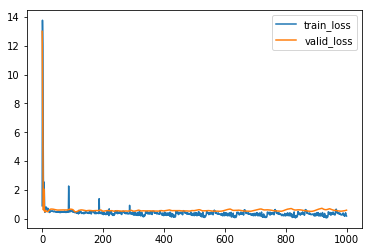

In [11]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='train_loss')
mplot.plot(valid_loss, label='valid_loss')
mplot.legend()
mplot.show()

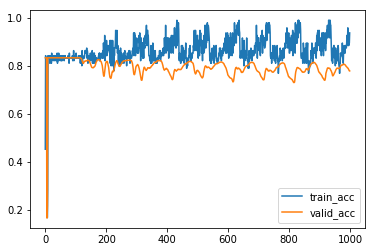

In [12]:
# import matplotlib.pyplot as mplot

mplot.plot(train_acc, label='train_acc')
mplot.plot(valid_acc, label='valid_acc')
mplot.legend()
mplot.show()